In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import datetime

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation

In [2]:
tracking2018 = pd.read_csv("data/tracking2018.csv")

In [3]:
tracking2018.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right


In [5]:
'''
Input: time, gameId
Output: pandas DF with all players on the field in that game at that time
'''

def get_all_players(gameId, time, df):
    return df.query('time == @time and gameId == @gameId')

In [6]:
time = tracking2018.iloc[0,0]
gameId = tracking2018.loc[0,'gameId']

first_entry = tracking2018.query('time == @time and gameId == @gameId')
first_entry

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
105,2018-12-30T21:25:32.200,62.04,14.23,0.07,0.52,0.00,272.98,325.00,None,40579.0,Ray-Ray Armstrong,52.0,OLB,away,1,2018123000,36,right
210,2018-12-30T21:25:32.200,61.62,5.06,0.08,0.14,0.01,334.89,246.70,None,41316.0,Phillip Gaines,33.0,CB,away,1,2018123000,36,right
315,2018-12-30T21:25:32.200,44.22,37.38,0.11,0.11,0.02,156.01,106.88,None,42398.0,Maxx Williams,87.0,TE,home,1,2018123000,36,right
420,2018-12-30T21:25:32.200,43.83,42.43,0.15,0.17,0.02,104.41,84.56,None,42437.0,Ty Montgomery,88.0,RB,home,1,2018123000,36,right
525,2018-12-30T21:25:32.200,62.88,29.53,0.11,0.17,0.01,225.55,349.40,None,42608.0,Jermaine Whitehead,35.0,FS,away,1,2018123000,36,right
630,2018-12-30T21:25:32.200,43.73,45.74,0.03,0.09,0.00,89.52,212.08,None,43349.0,Cyrus Jones,27.0,CB,home,1,2018123000,36,right
735,2018-12-30T21:25:32.200,43.85,9.23,0.12,0.17,0.01,85.29,230.55,None,43396.0,Chris Moore,10.0,WR,home,1,2018123000,36,right
840,2018-12-30T21:25:32.200,61.17,47.55,0.11,0.64,0.01,174.33,70.35,None,43407.0,Juston Burris,31.0,CB,away,1,2018123000,36,right
945,2018-12-30T21:25:32.200,89.92,26.65,0.21,0.55,0.02,275.78,153.01,None,43427.0,Seth DeValve,87.0,TE,away,1,2018123000,36,right


In [6]:
type(tracking2018.iloc[0,0])
tracking2018.iloc[0,0]

'2018-12-30T21:25:32.200'

In [7]:
# plotting - https://www.kaggle.com/robikscube/nfl-big-data-bowl-plotting-player-position

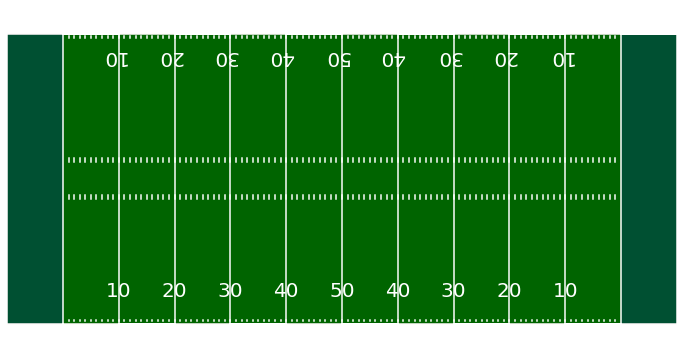

In [4]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

fig, ax = create_football_field()
plt.show()

No handles with labels found to put in legend.


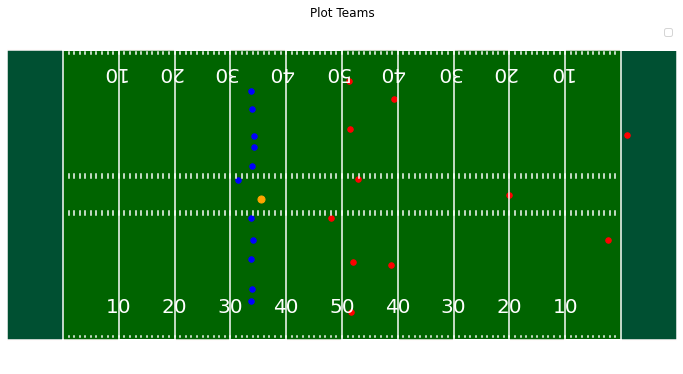

In [9]:
first_entry = tracking2018.query('time == @time and gameId == @gameId')
fig, ax = create_football_field()
first_entry.query("team == 'away'") \
    .plot(x='x', y='y', kind='scatter', ax=ax, color='red', s=30, legend='Away')
first_entry.query("team == 'home'") \
    .plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=30, legend='Home')
first_entry.query("displayName == 'football'") \
    .plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=50, legend='Football')
plt.title('Plot Teams')
plt.legend()
plt.show()

In [10]:
t = first_entry.iloc[0,0]
t

'2018-12-30T21:25:32.200'

In [11]:
d = datetime.datetime.strptime(t, "%Y-%m-%dT%H:%M:%S.%f")
print(d)
new = d + datetime.timedelta(milliseconds=100)
print(new)

2018-12-30 21:25:32.200000
2018-12-30 21:25:32.300000


In [12]:
np.array(first_entry['x']).reshape(-1,1)

array([[ 41.32],
       [ 62.04],
       [ 61.62],
       [ 44.22],
       [ 43.83],
       [ 62.88],
       [ 43.73],
       [ 43.85],
       [ 61.17],
       [ 89.92],
       [ 43.77],
       [111.06],
       [ 43.78],
       [ 43.93],
       [ 68.82],
       [ 43.72],
       [ 44.07],
       [ 57.95],
       [107.59],
       [ 69.24],
       [ 61.4 ],
       [ 44.19],
       [ 45.45]])

In [13]:
#fig, ax = create_football_field()
#scat = ax.scatter([],[], s=50)

# gameId = 2018123000
# time = first_entry.iloc[0,0]
# '''
# t = datetime.datetime.strptime(t, "%Y-%m-%dT%H:%M:%S.%f")
# new_t = d + datetime.timedelta(milliseconds=100*frame_index)
# new_time = new_t.strftime("%Y-%m-%dT%H:%M:%S.%f")

# new_df = get_all_players(gameId, new_time, tracking2018)
# x = new_df.x
# y = new_df.y
# '''
# #x = np.array(first_entry['x']).reshape(-1,1)
# #y = np.array(first_entry['y']).reshape(-1,1)

# #x = np.array([frame_index])
# #y = np.array([2])

# plt.close("all")

# fig = plt.figure(1)
# ax = plt.axes()
# scat = ax.scatter([],[],s=60)

# x = np.random.rand(40)
# y = np.random.rand(40)

# def init():

#     scat.set_offsets([])
#     return scat,

# def animate(i):
    
#     data = np.array([x[i], y[i]])
#     scat.set_offsets(data)
#     return scat,
    

# anim = FuncAnimation(fig, animate, init_func=init, interval = 1000, frames=10, blit=False)
# plt.show()

In [14]:
t = datetime.datetime.strptime(time, "%Y-%m-%dT%H:%M:%S.%f")
i=1

new_t = d + datetime.timedelta(milliseconds=100*i)
new_time = new_t.strftime("%Y-%m-%dT%H:%M:%S.%f")[:-3]

new_df = get_all_players(gameId, new_time, tracking2018)
x = np.array(new_df.x)
y = np.array(new_df.y)
data = np.zeros((len(x), 2))
data[:,0] = x
data[:,1] = y


<IPython.core.display.Javascript object>


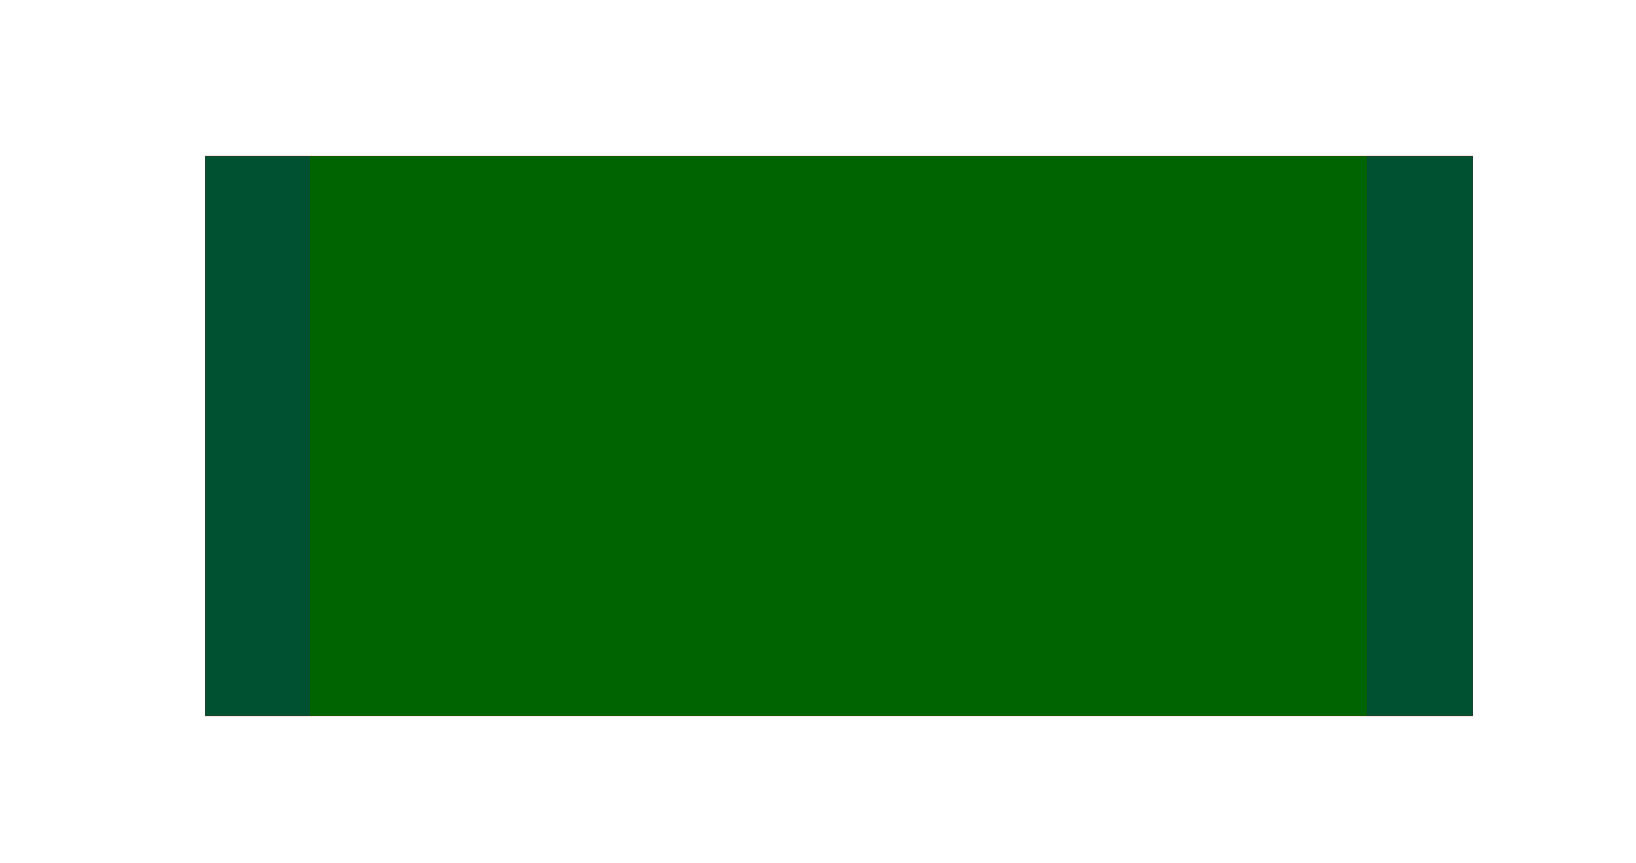

In [15]:
'''
first_entry.query("team == 'away'") \
    .plot(x='x', y='y', kind='scatter', ax=ax, color='red', s=30, legend='Away')
'''


def update_plot(i, tracking2018, time, scat):
    t = datetime.datetime.strptime(time, "%Y-%m-%dT%H:%M:%S.%f")
    new_t = d + datetime.timedelta(milliseconds=100*i)
    new_time = new_t.strftime("%Y-%m-%dT%H:%M:%S.%f")[:-3]

    new_df = get_all_players(gameId, new_time, tracking2018)
    x = np.array(new_df.x)
    y = np.array(new_df.y)
    data = np.zeros((len(x), 2))
    data[:,0] = x
    data[:,1] = y
    
    new_df = new_df.replace({"team":team_dict})
    
    # change team colors
    #home = new_df.query("team == 'home'")
    #away = new_df.query("team == 'away'")
    scat.set_array(np.array(new_df['team']))
    scat.set_offsets(data)
    
    return scat,

gameId = 2018123000
time = first_entry.iloc[0,0]
'''
t = datetime.datetime.strptime(t, "%Y-%m-%dT%H:%M:%S.%f")
new_t = d + datetime.timedelta(milliseconds=100*frame_index)
new_time = new_t.strftime("%Y-%m-%dT%H:%M:%S.%f")

new_df = get_all_players(gameId, new_time, tracking2018)
x = new_df.x
y = new_df.y
'''
%matplotlib notebook

numframes = 1000
numpoints = 10

team_dict = {"home":1, "away":10, "football":20}
new_first_entry = first_entry.replace({"team":team_dict})
#print(first_entry)

fig, ax = create_football_field()
scat = ax.scatter(first_entry['x'],first_entry['y'], c=np.array(new_first_entry['team']), s=50)
#fig = plt.figure()
#scat = plt.scatter(first_entry['x'],first_entry['y'], s=50)

ani = FuncAnimation(fig, update_plot, frames=numframes, fargs=(tracking2018, time, scat))
plt.show()